In [1]:
import pandas as pd

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import os
os.getcwd()

'C:\\Users\\Vivek\\Desktop'

In [20]:
os.chdir('C:\\Users\\Vivek\Desktop')

In [21]:
customers = pd.read_csv("Customers.csv")

In [22]:
products = pd.read_csv("Products.csv")

In [23]:
transactions = pd.read_csv("Transactions.csv")

In [35]:
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()


In [36]:
# Selecting features for clustering (e.g., TotalValue, Quantity, etc.)
features = customer_profile[['TotalValue', 'Quantity']]

In [37]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [24]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [25]:
# Using customer features for clustering
X = scaled_featuresclustering_data = merged_data[['TotalValue', 'Quantity', 'Price_y']]

In [26]:
# Check if required columns are in the data
required_columns = ['TotalValue', 'Quantity', 'Price_y']
missing_columns = [col for col in required_columns if col not in merged_data.columns]

if missing_columns:
    print(f"Missing columns in the dataset: {missing_columns}")
else:
    print("All required columns are present.")

All required columns are present.


In [27]:
if not missing_columns:
    # Selecting relevant features for clustering
    clustering_data = merged_data[required_columns]

    # Droping missing values
    clustering_data = clustering_data.dropna()

    # Standardizing the data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Converting scaled data back to DataFrame for readability
    scaled_data = pd.DataFrame(scaled_data, columns=required_columns)
    print("Clustering data prepared successfully.")
else:
    print("Cannot proceed without the required columns.")

Clustering data prepared successfully.


In [28]:
if 'clustering_data' in locals():
    # Apply K-Means clustering
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust `n_clusters` as needed
    clusters = kmeans.fit_predict(scaled_data)

    # Add cluster labels to the original data
    clustering_data['Cluster'] = clusters

    # Evaluate clustering using silhouette score
    silhouette_avg = silhouette_score(scaled_data, clusters)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Clustering data is not defined. Ensure preprocessing is done correctly.")

Silhouette Score: 0.4555522291934299


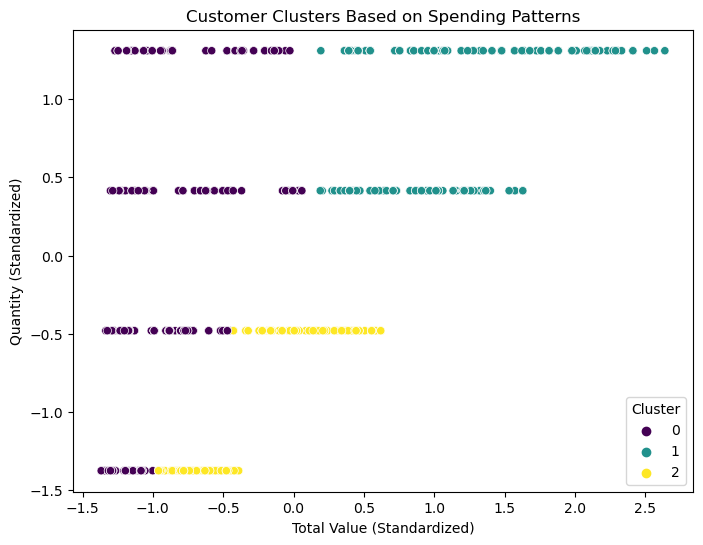

In [29]:
if 'clustering_data' in locals():
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Scatter plot of clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=scaled_data['TotalValue'], 
        y=scaled_data['Quantity'], 
        hue=clustering_data['Cluster'], 
        palette='viridis'
    )
    plt.title("Customer Clusters Based on Spending Patterns")
    plt.xlabel("Total Value (Standardized)")
    plt.ylabel("Quantity (Standardized)")
    plt.legend(title="Cluster")
    plt.show()
else:
    print("Cannot visualize as clustering data is not defined.")

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Choosing the number of clusters between 2 and 10
customer_profile['Cluster'] = kmeans.fit_predict(scaled_features)

In [41]:
# Calculate DB Index for evaluation
db_index = davies_bouldin_score(scaled_features, customer_profile['Cluster'])


Text(0.5, 1.0, 'Customer Segmentation')

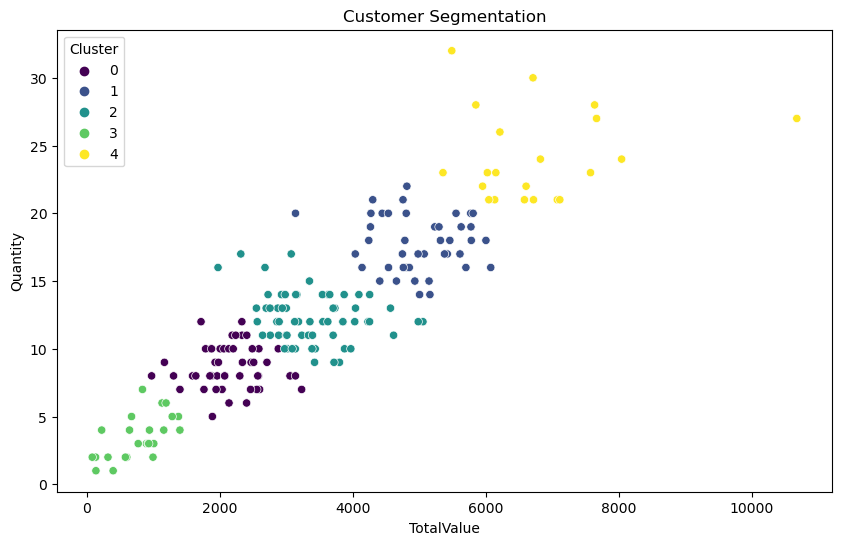

In [42]:
# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=customer_profile['TotalValue'], y=customer_profile['Quantity'], hue=customer_profile['Cluster'], palette='viridis')
plt.title('Customer Segmentation')